<div class="alert alert-block alert-danger">
    
## Table of Contents

</div>    

[1. Introduction](#Intro) <br>
[2. Importing Libraries](#libs) <br>
[3. Examining Raw Data(given input file from task1)](#examine1) <br>
[4. Examining metadata](#examine2) <br>
[5. Data Analysis](#DA) <br>
    - [5.1 Question 1: On which days of the week are users most likely to submit product reviews?](#DI1) <br>
    - [5.2 Question 2: How does the length of product reviews vary across different star ratings?](#DI2) <br>
    - [5.3 Question 3: How has the number of Amazon product reviews changed over time?](#DI3) <br>
    - [5.4 Question 4: What kind of review content or structure is more likely to receive helpful votes?](#DI4) <br>
    - [5.5 Question 5: What types of words are most common in helpful reviews, and what do they reveal about what users consider helpful?](#DI5) <br>
    - [5.6 Question 6: What are the most frequently mentioned keywords in product reviews?](#DI6) <br>
[6. Data Analysis Summary](#summary) <br>
[7. References](#Ref) <br>

<div class="alert alert-block alert-warning">

## 1.Introduction  <a class="anchor" name="Intro"></a>
    
</div>

***The goal of Task 3 is to perform exploratory data analysis (EDA) on a dataset of Amazon product reviews to uncover interesting patterns, trends, or insights.***

<div class="alert alert-block alert-warning">
    
## 2.Importing Libraries  <a class="anchor" name="libs"></a>
 </div>

The packages to be used in this assessment are imported in the following. They are used to fulfill the following tasks:

- **pandas**: for data loading and manipulation
- **matplotlib.pyplot**: for creating basic plots and charts
- **seabor**n: for advanced and styled visualizations
- **datetime**: for handling and extracting time information
- **json**: for loading and parsing JSON data files
- **collections.defaultdict**: for initializing dictionaries with default values, particularly useful when counting or aggregating token frequencies.
- **wordcloud.WordCloud**: for generating word cloud visualizations to represent the frequency of words in textual reviews.
- **collections.Counter**: for efficiently counting the occurrences of elements such as tokens or categorical values.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import json
from collections import defaultdict
from wordcloud import WordCloud
from collections import Counter

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<div class="alert alert-block alert-warning">

## 3.Examining Raw Data(given input file from task1) <a class="anchor" name="examine1"></a>

 </div>

***This section provides a preliminary exploration of the raw dataset by reviewing a sample of individual records and understanding how the data is structured.***

**Sample Review Records**:

  - A sample of five review entries reveals the typical structure and content of the data:

    - category: Product category (industrial_and_scientific)

    - reviewer_id: Anonymous ID of the reviewer

    - rating: Numerical rating (1.0 to 5.0)

    - review_title: Short summary of the review

    - review_text: Full content of the user's feedback

    - attached_images: Whether an image is included

    - product_id & parent_product_id: Unique identifiers for product and parent group

    - review_timestamp: Date and time when the review was posted

    - is_verified_purchase: Indicates if the reviewer actually purchased the item

    - helpful_votes: Number of users who found the review helpful

**Observations:**

  - Reviews vary in tone and length, with some containing rich text and others being very brief.

  - Verified purchase flags are present in most entries, allowing for trustworthiness evaluation.

  - Helpful_votes often have a value of zero, indicating limited engagement from other users.

  - The dataset contains multilingual input (e.g., Spanish in one review), implying potential for multilingual analysis.

**Usefulness:**

  - This structure enables detailed sentiment analysis, keyword extraction, and correlation studies (e.g., between helpfulness and review length, or verified status and rating).



In [3]:
with open("/content/drive/MyDrive/task1_group_168.json") as f:
    raw_data = json.load(f)

In [4]:
# Flatten into a DataFrame
all_reviews = []
for product_id, product_data in raw_data.items():
    for review in product_data["reviews"]:
        review["parent_product_id"] = product_id
        all_reviews.append(review)

df = pd.DataFrame(all_reviews)

df.sample(5)

,category,reviewer_id,rating,review_title,review_text,attached_images,product_id,review_timestamp,is_verified_purchase,helpful_votes,parent_product_id
89459,industrial_and_scientific,aed667zdzx3ptvqq4vloynizbrua,5.0,doing the job,these snap hooks were bought to be added to th...,none,b0187qwt2k,2020-10-27 18:37:59,True,0,b01m73rfkn
19721,industrial_and_scientific,ahmhbzlumuwldrstzu6tejnwqwcq,5.0,digital optical to rca converter,"fantastic unit, wife and kids said i was nuts ...",none,b003ond0n4,2011-05-01 16:48:23,True,18,b003ond0n4
122854,industrial_and_scientific,agl72h4q46vqqcrvemyz55l56dvq,5.0,glass bottles,these bottles are amazing!,none,b07fdh5l6n,2019-05-16 06:16:03,True,0,b07fdh5l6n
94290,industrial_and_scientific,aguqhl5mgttabimdzrqqzxrqjrlq,1.0,don't order this!!!!,"the grabber, wouldn't hold in a open position...",none,b06vvqkgcq,2018-06-15 17:26:41,True,0,b06vvqkgcq
58067,industrial_and_scientific,agpl37vi7rpxf2y5dhfpfpualk3a,5.0,fast shipping,great on popcorn,none,b00o4l9iya,2021-10-19 03:48:15,True,0,b00o4l9iya


<div class="alert alert-block alert-warning">

## 4.Examining Metadata <a class="anchor" name="examine2"></a>

 </div>

***This section provides an initial understanding of the dataset by examining its structure, key features, and value distributions.***

**Dataset Overview**
- Total Reviews: 278,238

- Unique Products: 89,141

- Sample Fields: category, reviewer_id, rating, review_title, review_text,
attached_images, product_id, review_timestamp,
is_verified_purchase, helpful_votes, parent_product_id

**Data Quality Check**
- Missing Values: No missing values were found across all columns.

- This ensures the dataset is complete and reliable for analysis without additional imputation or cleaning.

**Initial Observations**
- Ratings Distribution:
  - 5-star reviews dominate the dataset, accounting for over 68% of total reviews.

  - Ratings of 1–3 stars are relatively rare, suggesting a generally positive sentiment among users.

**Potential Implications**
- The overwhelmingly positive rating distribution might indicate a bias toward favorable reviews.

- The presence of verified purchase flags and helpful votes enables trustworthiness analysis and user engagement insights.

In [5]:
# Basic Overview
print("Total Reviews:", len(df))
print("Unique Products:", df["parent_product_id"].nunique())
print("\nSample Records:")
display(df.head())

print("\nMissing Value Summary:")
display(df.isnull().sum())

print("\nRating Distribution:")
display(df["rating"].value_counts(normalize=True).sort_index())

Total Reviews: 278238
Unique Products: 89141

Sample Records:


,category,reviewer_id,rating,review_title,review_text,attached_images,product_id,review_timestamp,is_verified_purchase,helpful_votes,parent_product_id
0,industrial_and_scientific,aheutzza5vraknyxplzvchlot3na,5.0,very good,just what i needed for pharm school,none,0176496920,2017-08-15 01:45:00,True,0,0176496920
1,industrial_and_scientific,ahy7vyqny6k3zoy7ee3r3efpngoa,5.0,great device,this device was hard to find for my daughter's...,none,1934931403,2012-11-06 07:09:05,True,1,0176496920
2,industrial_and_scientific,aebizpke5odh7nnytl2sdqdmqyuq,5.0,five stars,works great!,none,0176496920,2017-02-13 14:50:59,True,0,0176496920
3,industrial_and_scientific,agkh3hpiglkor3wxzeduz65jmnha,1.0,not working,its not working and make damage to my computer,none,0201336421,2021-02-14 01:17:15,True,0,0201336421
4,industrial_and_scientific,afepym5nkvy65ya7xe526kkjnuta,5.0,its worth it for mobile mechanis,nice thing with this is i can hook it to my ta...,none,0201336421,2022-10-24 03:27:10,True,0,0201336421



Missing Value Summary:


,0
category,0
reviewer_id,0
rating,0
review_title,0
review_text,0
attached_images,0
product_id,0
review_timestamp,0
is_verified_purchase,0
helpful_votes,0



Rating Distribution:


,proportion
rating,
1.0,0.103681
2.0,0.045497
3.0,0.061451
4.0,0.105913
5.0,0.683458


<div class="alert alert-block alert-warning">

## 5.Data Analysis <a class="anchor" name="DA"></a>

 </div>

 In this section, we are looking into 5 data insights from the data...



In [6]:
# === Step 1: Prepare df from previously loaded raw_data ===
review_list = []
for pid, entry in raw_data.items():
    for r in entry["reviews"]:
        r["parent_product_id"] = pid
        review_list.append(r)

df = pd.DataFrame(review_list)
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df["is_verified_purchase"] = df["is_verified_purchase"].map({"True": "Yes", "False": "No"})
df['review_length'] = df['review_text'].str.split().apply(len)

<div class="alert alert-block alert-info">
    
### 5.1. On which days of the week are users most likely to submit product reviews? <a class="anchor" name="DI1"></a>

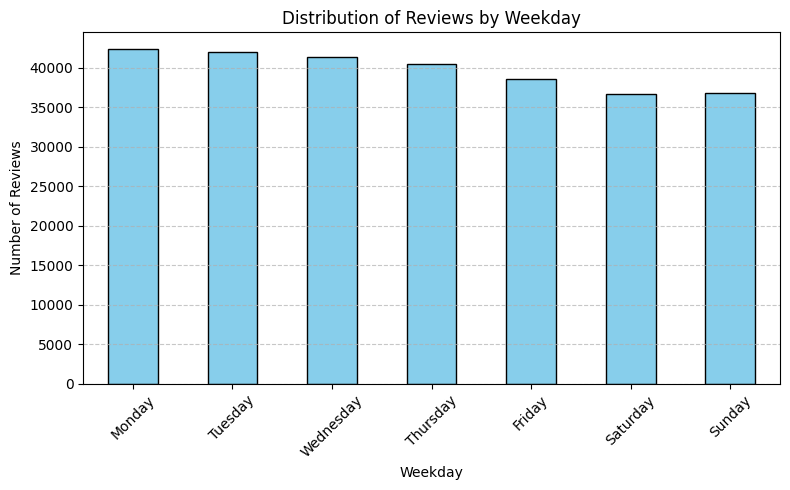

In [7]:
# === Insight 1: Review Distribution by Weekday ===
# Extract weekdays from review timestamps
weekdays = []
for ts in df["review_timestamp"]:
    try:
        if ts and ts != "none":
            ts = ts.replace("–", "-")
            dt = datetime.strptime(ts, "%Y-%m-%d %H:%M:%S")
            weekdays.append(dt.strftime("%A"))
    except:
        weekdays.append(None)

df["weekday"] = weekdays

# Count reviews by weekday (ordered)
weekday_counts = df["weekday"].value_counts().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

# Plot weekday distribution
weekday_counts.plot(kind="bar", color="skyblue", edgecolor="black", figsize=(8, 5))
plt.title("Distribution of Reviews by Weekday")
plt.ylabel("Number of Reviews")
plt.xlabel("Weekday")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

-------------------------------------

<div class="alert alert-block alert-info">
    
### 5.2. How does the length of product reviews vary across different star ratings? <a class="anchor" name="DI2"></a>

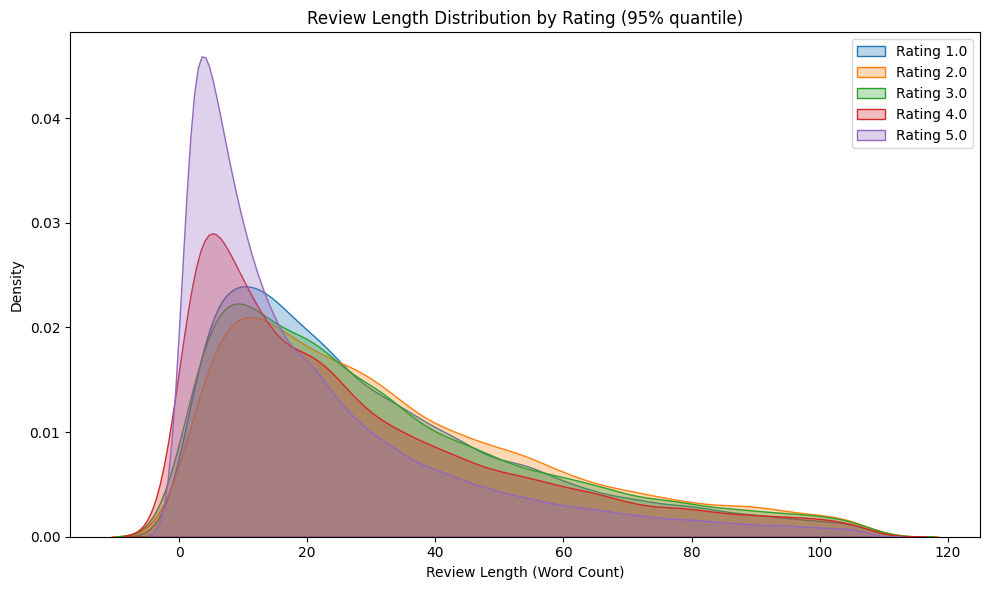

In [8]:
# === Insight 2: Review Length vs Rating ===
# Trim long tail by keeping only the bottom 95% of review lengths
cutoff = df['review_length'].quantile(0.95)
df_trimmed = df[df['review_length'] <= cutoff]

# Plot KDE for review length distribution by rating
plt.figure(figsize=(10, 6))
for rating in sorted(df_trimmed['rating'].unique()):
    subset = df_trimmed[df_trimmed['rating'] == rating]
    sns.kdeplot(subset['review_length'], label=f'Rating {rating}', fill=True, alpha=0.3)

plt.title("Review Length Distribution by Rating (95% quantile)")
plt.xlabel("Review Length (Word Count)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

-------------------------------------

<div class="alert alert-block alert-info">
    
### 5.3. How has the number of Amazon product reviews changed over time? <a class="anchor" name="DI3"></a>

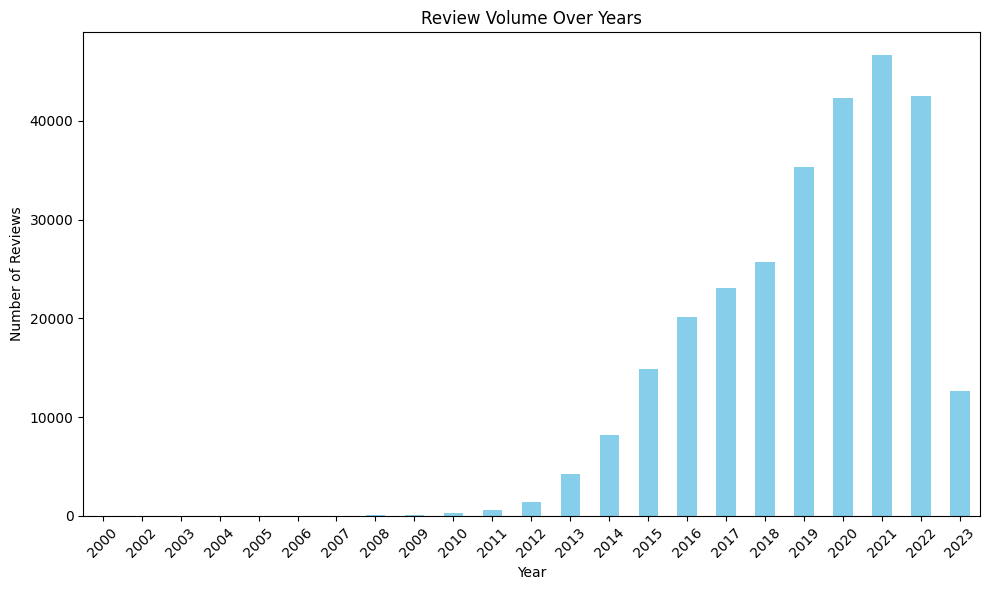

In [9]:
# === Insight 3: Review Volume Over Years ===
# Convert review_timestamp to datetime format
df['review_timestamp'] = pd.to_datetime(df['review_timestamp'], errors='coerce')

# Extract year from timestamp
df['review_year'] = df['review_timestamp'].dt.year

# Count reviews per year
yearly_counts = df['review_year'].value_counts().sort_index()
yearly_counts = yearly_counts[yearly_counts > 0]  # Exclude invalid years

# Plot yearly review volume
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color='skyblue')
plt.title("Review Volume Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

-------------------------------------

<div class="alert alert-block alert-info">
    
### 5.4. What kind of review content is more likely to receive helpful votes? <a class="anchor" name="DI4"></a>

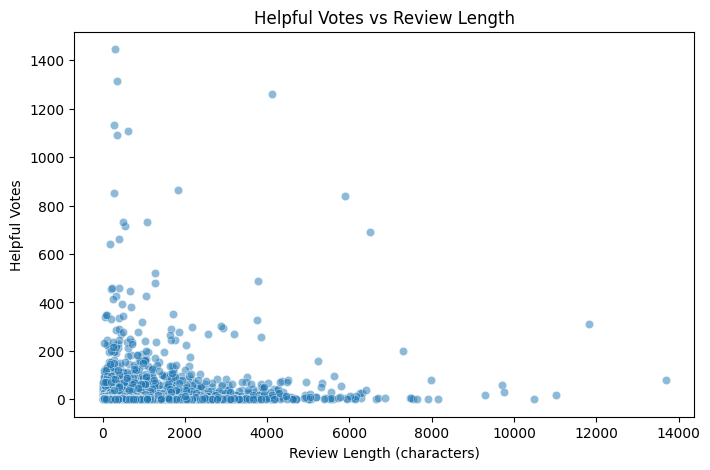

In [10]:
# === Insight 4: Helpsful Votes vs Review Length ===

# Adjusting data
df["helpful_votes"] = pd.to_numeric(df["helpful_votes"], errors="coerce").fillna(0)
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df["is_verified_purchase"] = df["is_verified_purchase"].astype(str)
df["review_text"] = df["review_text"].astype(str)
df["review_length"] = df["review_text"].apply(len)

# Visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(x="review_length", y="helpful_votes", alpha=0.5, data=df)
plt.title("Helpful Votes vs Review Length")
plt.xlabel("Review Length (characters)")
plt.ylabel("Helpful Votes")
plt.show()

-------------------------------------

<div class="alert alert-block alert-info">
    
### 5.5. What types of words are most common in helpful reviews? <a class="anchor" name="DI5"></a>

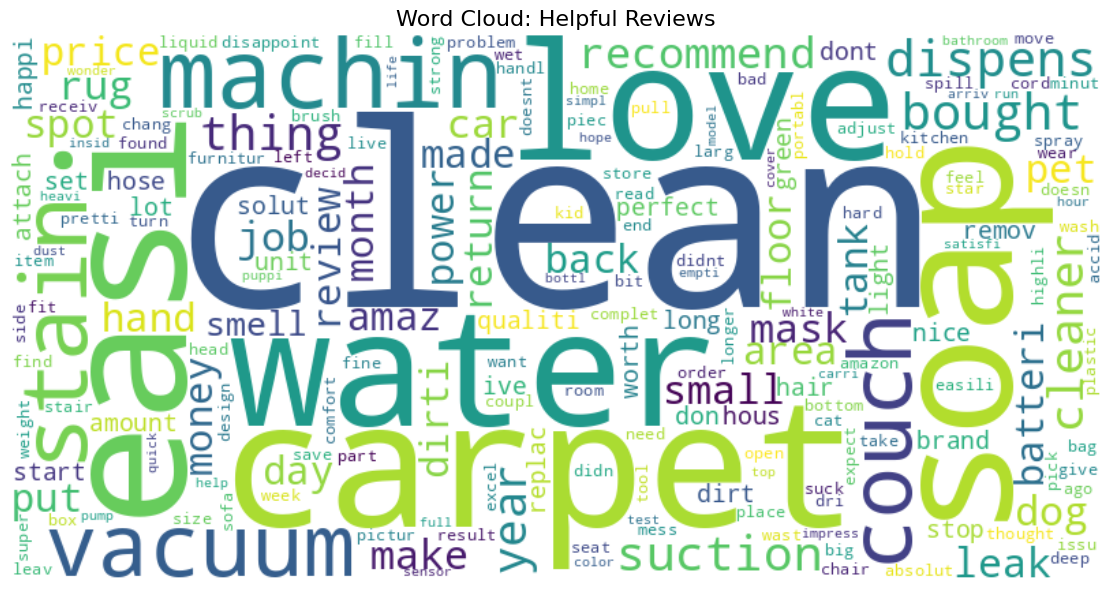

In [11]:
# === Insight 5: Word Cloud: Helpful Reviews ===

# Extract is_helpful information
records = []
for parent_id, entry in raw_data.items():
    for r in entry["reviews"]:
        rating = r.get("rating", "none")
        helpful_votes = r.get("helpful_votes", 0)
        if rating != "none":
            try:
                rating = float(rating)
                helpful_votes = int(helpful_votes)
                is_helpful = helpful_votes >= 1
                records.append({
                    "parent_product_id": parent_id,
                    "rating": rating,
                    "is_helpful": is_helpful
                })
            except:
                pass

df_helpful = pd.DataFrame(records)
df_helpful.to_csv("rating_with_helpful_flag.csv", index=False)

# Load vocab.txt
vocab = {}
with open("/content/drive/MyDrive/group_168_vocab.txt", encoding="utf-8") as f:
    for line in f:
        token, index = line.strip().split(":")
        vocab[int(index)] = token

# Load countvec.txt
countvec_data = []
with open("/content/drive/MyDrive/group_168_countvec.txt", encoding="utf-8") as f:
    for line in f:
        parts = line.strip().split(",")
        parent_id = parts[0]
        token_counts = {
            int(i.split(":")[0]): int(i.split(":")[1])
            for i in parts[1:] if ":" in i
        }
        countvec_data.append({
            "parent_product_id": parent_id,
            "token_counts": token_counts
        })

df_countvec = pd.DataFrame(countvec_data)

# Merge Data
df_merged = df_countvec.merge(df_helpful, on="parent_product_id")

# Keep records where is_helpful is True
df_helpful_only = df_merged[df_merged["is_helpful"] == True]

# Count word frequency
helpful_tokens = defaultdict(int)

for _, row in df_helpful_only.iterrows():
    for token_id, count in row["token_counts"].items():
        token = vocab[token_id]
        helpful_tokens[token] += count

# Generate word cloud
wc = WordCloud(width=800, height=400, background_color="white")

if not helpful_tokens:
    helpful_tokens["empty"] = 1

wc_helpful = wc.generate_from_frequencies(helpful_tokens)

# Visualization
plt.figure(figsize=(12, 6))
plt.imshow(wc_helpful, interpolation="bilinear")
plt.title("Word Cloud: Helpful Reviews", fontsize=16)
plt.axis("off")
plt.tight_layout()
plt.show()

-------------------------------------

<div class="alert alert-block alert-info">
    
### 5.6. What are the most frequently mentioned keywords in product reviews？<a class="anchor" name="DI6"></a>

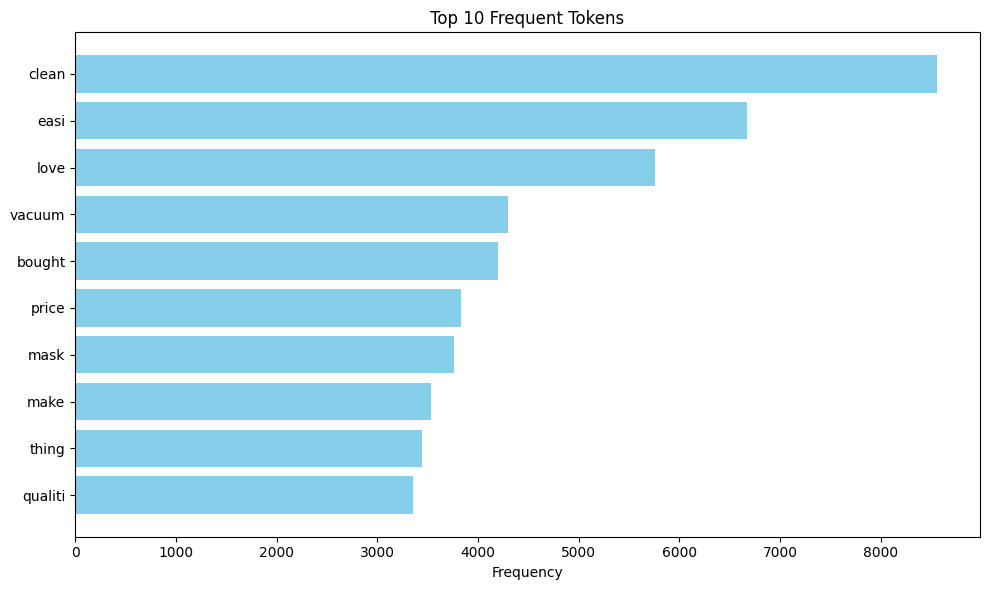

In [12]:
# === Insight 6: Top10 Frequent Tokens===

# Load countvec.txt to count word frequencies
total_counter = Counter()
with open("/content/drive/MyDrive/group_168_countvec.txt", encoding="utf-8") as f:
    for line in f:
        parts = line.strip().split(",")
        token_counts = parts[1:]
        for item in token_counts:
            if ":" in item:
                idx, count = map(int, item.split(":"))
                total_counter[vocab[idx]] += count

# Select the top 10 tokens and draw a bar chart
top_10 = total_counter.most_common(10)
tokens, counts = zip(*top_10)

# Visualization
plt.figure(figsize=(10, 6))
plt.barh(tokens[::-1], counts[::-1], color="skyblue")
plt.xlabel("Frequency")
plt.title("Top 10 Frequent Tokens")
plt.tight_layout()
plt.show()

-------------------------------------

<div class="alert alert-block alert-warning">

## 6.  Data Analysis Summary <a class="anchor" name="summary"></a>

 </div>


**Question 1:**
On which days of the week are users most likely to submit product reviews?

**Visualisation:**
A bar chart displaying the number of reviews submitted on each weekday, from Monday to Sunday.

**Interpretation:**
The chart reveals a subtle yet consistent trend in review activity throughout the week:
- Monday and Tuesday have the highest review volumes, slightly above other days.

- Review activity gradually declines toward the weekend, reaching the lowest levels on Saturday and Sunday.

This pattern may suggest that users are more inclined to leave reviews during weekdays, possibly due to:
- Returning to routine activities after receiving products over the weekend.

- Increased online engagement during workdays compared to weekends.

For future suggestions, businesses and platforms could:
- Time promotional review prompts or follow-up emails earlier in the week to maximize response rates.

- Monitor reviews more actively at the start of the week to catch and address feedback promptly.



-------------------------------------

**Question 2:**
How does the length of product reviews vary across different star ratings?

**Visualisation**:
A KDE plot showing the distribution of review lengths for each star rating (1 to 5 stars), filtered to the 95% quantile to remove outliers and better observe core patterns.

**Interpretation**:

The plot reveals a clear relationship between review length and rating:

- Shorter reviews tend to correspond to higher ratings.
Reviews with 5-star ratings typically have shorter word counts, often peaking between 5–10 words.
This suggests that satisfied users often leave brief praise like "Great product!" or "Love it!".

- Lower ratings are associated with longer and more varied reviews.
Ratings from 1 to 3 stars show broader distributions, indicating that users are more likely to provide detailed feedback when dissatisfied, possibly to explain specific problems.

- All distributions are right-skewed.
This is typical in user-generated content, where a small subset of users writes exceptionally long reviews.

For future suggestions, businesses could:

- Prioritize analyzing long negative reviews to identify recurring product issues.

- Encourage more descriptive positive reviews to enhance credibility and helpfulness.

- Use review length as an auxiliary signal for automated sentiment classification or quality filtering.

-------------------------------------

**Question 3:** How has the number of Amazon product reviews changed over time?

**Visualisation:**
A bar chart showing the number of reviews submitted each year from 2000 to 2023.

**Interpretation:**
  - The number of reviews remained minimal before 2010 but began to grow steadily afterward. A sharp upward trend began in 2014, likely driven by the rise of e-commerce platforms and growing consumer engagement with online reviews. The review volume peaked in 2021, possibly due to increased online shopping during the COVID-19 pandemic. However, a decline is observed in 2022 and 2023, which may reflect market saturation, shifts to other platforms, or normalization of post-pandemic shopping habits. This long-term trend highlights evolving consumer behavior and the influence of external events on online engagement.

For future suggestions, businesses could:

  - Analyze what factors contributed to the 2021 peak to recreate similar engagement strategies.

  - Leverage past high-activity periods to plan product launches or promotional campaigns.

  - Investigate declining trends to identify opportunities for re-engagement.

-------------------------------------

**Question 4:** What kind of review content or structure is more likely to receive helpful votes?

**Visualisation:**
A scatter plot showing the relationship between review length (in characters) and helpful votes.

**Interpretation:**
  - The majority of reviews have relatively short lengths (under 2000 characters), and they also tend to receive fewer helpful votes.

  - However, several mid-length reviews (between 500–2000 characters) appear to receive a relatively higher number of helpful votes, suggesting that concise but informative reviews are more appreciated by readers.

  - Very long reviews (over 4000 characters) are rare and do not consistently receive high helpful votes, possibly due to reader fatigue or verbosity.

  - There is no clear linear correlation between length and helpfulness — while more detailed reviews may help, quality and clarity are likely more important than sheer length.

For future suggestions, businesses could:

  - Encourage users to write moderately detailed reviews, for example, like 500–1500 characters, as they are more likely to be seen as helpful.

  - Provide review-writing prompts or structure like pros/cons or usage context to help users generate focused content.

-------------------------------------

**Question 5:** What are the most frequently mentioned words in reviews that users found helpful?

**Visualisation:** A word cloud generated from reviews that received at least one helpful vote.

**Interpretation**:

  - The most prominent tokens include “clean”, “carpet”, “easy”, “soap”, “vacuum”, “water”, and “love”.
  - These high-frequency words reflect key features or sentiments commonly mentioned in helpful reviews:
    
    - “clean”, “soap”, and “vacuum” suggest that cleaning-related products are frequently discussed and valued.

    - “easy” indicates that ease of use is a highly appreciated feature among users.

    - “love” reveals a strong emotional satisfaction, showing that positively expressive reviews tend to be voted helpful.

    - Other words like “carpet”, “machine”, and “dispenser” imply specific types of products that are more likely to receive helpful votes.

  - Overall, practicality, usability, and product effectiveness emerge as recurring themes in helpful reviews.

For future suggestions, businesses could:
  - Encourage customers to write reviews that focus on their usage experience to increase the chances of reviews being marked helpful.

  - Provide a review option for customers to click or provide a proper review reward mechanism.

-------------------------------------

**Question 6:** What are the most frequently mentioned keywords in product reviews?

**Visualisation:** A horizontal bar chart showing the top 10 most frequent tokens from product reviews.


**Interpretation**
  - -The top tokens are: “clean”, “easi” (easy), “love”, “vacuum”, “bought”, “price”, “mask”, “make”, “thing”, and “qualiti” (quality).

  - These words reflect key themes in user reviews:

    - “clean”, “vacuum”, and “mask” suggest frequent discussions around cleanliness and cleaning-related products.

    - “easi”, “love”, and “make” point to ease of use and positive sentiment.

    - “bought” and “price” highlight user attention to purchasing decisions and affordability.

    - “qualiti” indicates that product quality is a common concern among reviewers.

For future suggestions, businesses could:
  - Leverage frequent keywords for SEO and marketing, using terms like “easy to use carpet vacuum” to enhance visibility and engagement.

  - Encourage customers to share their real usage experience, especially focusing on ease, effectiveness, and satisfaction, which may increase the helpfulness of reviews.

<div class="alert alert-block alert-warning">

## 7. References <a class="anchor" name="Ref"></a>

</div>